### Task 03:

In this task, you have to implement the Backpropagation method using Pytorch. This is particularly useful when the hypothesis function contains several weights.

**Backpropagation**: Algorithm to caculate gradient for all the weights in the network with several weights. 

* It uses the `Chain Rule` to calcuate the gradient for multiple nodes at the same time. 
* In pytorch this is implemented using a `variable` data type and `loss.backward()` method to get the gradients

In [1]:
# import the necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preliminaries - Pytorch Basics


### Excercise 1 : 
Convert the following lists into a tensor and analyse it's properties.

* Integer List $[0, 1, 2, 3, 4]$ to a $int$ torch tensor
* Float List $[0.0, 1.0, 2.0, 3.0, 4.0]$ to a $float$ torch tensor

In [2]:
int_list = [1,2,3,4]
ints_to_tensor = torch.IntTensor(int_list)
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())
print("The size of the ints_to_tensor: ", ints_to_tensor.size())
print("The dimension of the ints_to_tensor: ",ints_to_tensor.ndimension())

The dtype of tensor object after converting it to tensor:  torch.int32
The type of tensor object after converting it to tensor:  torch.IntTensor
The size of the ints_to_tensor:  torch.Size([4])
The dimension of the ints_to_tensor:  1


In [3]:
float_list = [0.0, 1.0, 2.0, 3.0, 4.0]
floats_to_tensor = torch.FloatTensor(float_list)
print("The dtype of tensor object after converting it to tensor: ", floats_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", floats_to_tensor.type())
print("The size of the floats_to_tensor: ", floats_to_tensor.size())
print("The dimension of the floats_to_tensor: ",floats_to_tensor.ndimension())

The dtype of tensor object after converting it to tensor:  torch.float32
The type of tensor object after converting it to tensor:  torch.FloatTensor
The size of the floats_to_tensor:  torch.Size([5])
The dimension of the floats_to_tensor:  1


### Excercise 2 :
Convert the given numpy array to a torch tensor and again back to a numpy array

In [4]:
my_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]

numpy_array = np.asarray(my_list)
print("The numpy array: ", numpy_array)
print("Type : ", numpy_array.dtype)

tensor_array = torch.from_numpy(numpy_array)
print("\nNumpy Array -> Tensor:")
print("The tensor after converting:", tensor_array)
print("Type after converting: ", tensor_array.dtype)

new_numpy_array = tensor_array.numpy()
print("\nTensor -> Numpy Array:")
print("The numpy array after converting: ", new_numpy_array)
print("Type after converting: ", new_numpy_array.dtype)

The numpy array:  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type :  int64

Numpy Array -> Tensor:
The tensor after converting: tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Type after converting:  torch.int64

Tensor -> Numpy Array:
The numpy array after converting:  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type after converting:  int64


### Excercise 3 :
Determine the derivative of $y = 2x^{3} + x$ at $x = 1$

In [5]:
x = torch.tensor(1.0, requires_grad = True)
y = 2 * (x ** 3) + x
y.backward()
print("Value of Y at x=1 : " , y)
print("Derivative of Y wrt x at x=1 : " , x.grad)

Value of Y at x=1 :  tensor(3., grad_fn=<AddBackward0>)
Derivative of Y wrt x at x=1 :  tensor(7.)


### Excersie 4 :
Determine the partial derivative of $y = uv + u^{2}$ at $u=1$ and $v=2$ with respect to $u$ and $v$.

In [6]:
u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)
y = (u * v) + (u**2)
y.backward()
print("Value of y at u=1, v=2 : " , y)
print("Partial Derivative of y wrt u : " , u.grad)
print("Partial Derivative of y wrt v : " , v.grad)

Value of y at u=1, v=2 :  tensor(3., grad_fn=<AddBackward0>)
Partial Derivative of y wrt u :  tensor(4.)
Partial Derivative of y wrt v :  tensor(1.)


#### Hypothesis Function and Loss Function

$y = x * w + b$

$loss =(\hat{y}-y)^2$

Let us make use of a randomly-created sample dataset as follows

In [7]:
#sample-dataset
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

## Task: 03 - a
Declare pytorch tensors for weight and bias and implement the forward and loss function of our model

In [8]:
# Define w = 1 and b = -1 for y = wx + b
# Note that w,b are learnable paramteter 
# i.e., you are going to take the derivative of the tensor(s).
w = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([-1.0], requires_grad=True)

assert w.item() == 1
assert b.item() == -1
assert w.requires_grad == True
assert b.requires_grad == True

In [9]:
# Function for forward pass to predict y
def forward(x):
    return x*w + b

# Function to calcuate the loss of the model
# Loss is the square of difference of prediction and actual value
def loss(y_pred,y_actual):
    return (y_pred-y_actual)**2

Calculate $y_{pred}$ for $x=4$ without training the model

In [10]:
y_pred_without_train = forward(4)

Begin Training

In [11]:
# In this method, we learn the dataset multiple times (called epochs)
# Each time, the weight (w) gets updates using the graident decent algorithm based on weights of the previous epoch

alpha = 0.01 # Let us set learning rate as 0.01
weight_list = []
loss_list=[]

# Training loop
for epoch in range(10):
    total_loss = 0
    count = 0
    
    for x, y in zip(x_data, y_data):
        
        y_pred = forward(x) # Forward pass
        current_loss = loss(y_pred,y) # Loss
        total_loss += current_loss
        current_loss.backward() # Backpropagation
        
        w.data = w.data - alpha * w.grad.item() # update weights

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
        
        count += 1
        
    avg_mse = total_loss / count        
    print(f"Epoch: {epoch+1} | Loss: {avg_mse.item()} | w: {w.item()}")
    weight_list.append(w)
    loss_list.append(avg_mse)  

Epoch: 1 | Loss: 8.32815933227539 | w: 1.368575930595398
Epoch: 2 | Loss: 4.635132312774658 | w: 1.641068696975708
Epoch: 3 | Loss: 2.6127521991729736 | w: 1.842525839805603
Epoch: 4 | Loss: 1.5045195817947388 | w: 1.991465449333191
Epoch: 5 | Loss: 0.8966817855834961 | w: 2.1015784740448
Epoch: 6 | Loss: 0.5628984570503235 | w: 2.182986259460449
Epoch: 7 | Loss: 0.3793121576309204 | w: 2.2431719303131104
Epoch: 8 | Loss: 0.2781200110912323 | w: 2.287667751312256
Epoch: 9 | Loss: 0.22218374907970428 | w: 2.3205642700195312
Epoch: 10 | Loss: 0.19114667177200317 | w: 2.3448848724365234


Calculate $y_{pred}$ for $x=4$ after training the model

In [12]:
y_pred_with_train = forward(4)

print("Actual Y Value for x=4 : 8")
print("Predicted Y Value before training : " , y_pred_without_train.item())
print("Predicted Y Value after training : " , y_pred_with_train.item())

Actual Y Value for x=4 : 8
Predicted Y Value before training :  3.0
Predicted Y Value after training :  8.379539489746094


## Task: 03 - b
Repeat **Task:03 - a** for the quadratic model defined below

#### Using backward propagation for quadratic model

$\hat{y} = x^2*w_{2} + x*w_{1}$

$loss = (\hat{y}-y)^2$

* Using Dummy values of x and y

`x = 1,2,3,4,5`
`y = 1,6,15,28,45`

In [13]:
x_data = [1.0, 2.0, 3.0, 4.0, 5.0]
y_data = [1.0, 6.0, 15.0, 28, 45]

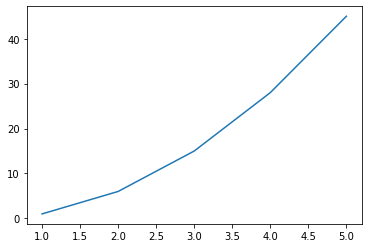

In [14]:
# Visualize the given dataset
plt.plot(x_data,y_data)
plt.show()

In [15]:
# Initialize w2 and w1 with randon values
w_1 = torch.tensor([1.0], requires_grad=True)
w_2 = torch.tensor([1.0], requires_grad=True)

In [16]:
# Quadratic forward pass based on the function above. Taking b as zero for now
def quad_forward(x):
    return w_1*(x**2)+w_2*x

# Loss fucntion as per the defination above
def loss(y_pred,y_actual):
    return (y_pred-y_actual)**2

Calculate $y_{pred}$ for $x=6$ without training the model

In [17]:
y_pred_without_train = quad_forward(6)

Begin Training

In [18]:
# In this method, we learn the dataset multiple times (called epochs)
# Each time, the weight (w) gets updates using the graident decent algorithm based on weights of the previous epoch

alpha = 0.0012 # Let us set learning rate as 0.01
weight_list = []
loss_list=[]

# Training loop
for epoch in range(100):
    total_loss = 0
    count = 0
    
    for x, y in zip(x_data, y_data):
        
        y_pred = quad_forward(x)
        current_loss = loss(y_pred, y)
        total_loss += current_loss
        current_loss.backward()
        
        w_1.data = w_1.data - alpha * w_1.grad.item()
        w_2.data = w_2.data - alpha * w_2.grad.item()
        
        # Manually zero the gradients after updating weights
        w_1.grad.data.zero_()
        w_2.grad.data.zero_()
        
        count += 1
        
    avg_mse = total_loss / count        
    print(f"Epoch: {epoch+1} | Loss: {avg_mse.item()} | w1: {w_1.item()} | w2: {w_2.item()}")
    weight_list.append(w)
    loss_list.append(avg_mse)
    


Epoch: 1 | Loss: 19.670841217041016 | w1: 1.7099769115447998 | w2: 1.1621068716049194
Epoch: 2 | Loss: 6.430711269378662 | w1: 1.610548496246338 | w2: 1.115532636642456
Epoch: 3 | Loss: 4.341702938079834 | w1: 1.629080057144165 | w2: 1.099595308303833
Epoch: 4 | Loss: 4.463932037353516 | w1: 1.6303775310516357 | w2: 1.0794039964675903
Epoch: 5 | Loss: 4.349801063537598 | w1: 1.6341499090194702 | w2: 1.060043454170227
Epoch: 6 | Loss: 4.273285865783691 | w1: 1.6375246047973633 | w2: 1.0407702922821045
Epoch: 7 | Loss: 4.193112373352051 | w1: 1.6409205198287964 | w2: 1.0216909646987915
Epoch: 8 | Loss: 4.115159511566162 | w1: 1.644276738166809 | w2: 1.0027880668640137
Epoch: 9 | Loss: 4.038552284240723 | w1: 1.6476027965545654 | w2: 0.9840622544288635
Epoch: 10 | Loss: 3.9633827209472656 | w1: 1.65089750289917 | w2: 0.9655115008354187
Epoch: 11 | Loss: 3.8896148204803467 | w1: 1.654161810874939 | w2: 0.9471341967582703
Epoch: 12 | Loss: 3.817220687866211 | w1: 1.6573951244354248 | w2: 0.

Calculate $y_{pred}$ for $x=4$ after training the model

In [19]:
y_pred_with_train = quad_forward(6)

print("Actual Y Value for x=4 : 66")
print("Predicted Y Value before training : " , y_pred_without_train.item())
print("Predicted Y Value after training : " , y_pred_with_train.item())

Actual Y Value for x=4 : 66
Predicted Y Value before training :  42.0
Predicted Y Value after training :  65.66741180419922
